In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
db = pd.read_csv("MR data - Compiled Data Set.csv")

In [3]:
db.head()
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 13 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                              --------------  -----  
 0   City                                                    

In [4]:
db.isnull().sum()

City                                                                                                                                                                                                                                                                                                                                                                                                              0
Title                                                                                                                                                                                                                                                                                                                                                                                                             0
Text                                                                                                                                                                                            

In [5]:
db.drop(["Title", "Text"], axis = 1, inplace = True)

In [6]:
db = db.rename(columns = {'Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other':'Murder Reason','Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act':'Crime Against Women'}, inplace=False)

In [7]:
db.head()

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women,Number of adult victims,Number of childs invoved
0,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MURDER DATA VISUALISATION

In [8]:
df1 = db.iloc[:,0:5]
df1["Number of child victims"].fillna(0, inplace = True)
df1["Number of male victims(adult)"].fillna(0, inplace = True)
df1["Number of female victims(adult)"].fillna(0, inplace = True)

In [9]:
df1.head()

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult)
0,Ghaziabad,NaN,0.0,0.0,0.0
1,Ghaziabad,NaN,0.0,0.0,0.0
2,Ghaziabad,NaN,0.0,0.0,0.0
3,Ghaziabad,NaN,0.0,0.0,0.0
4,Ghaziabad,NaN,0.0,0.0,0.0


In [10]:
df1.dropna(inplace = True)

In [11]:
df1.head()

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult)
10,Ghaziabad,Money Disputes,1.0,0.0,0.0
11,Ghaziabad,Love Affairs,0.0,0.0,1.0
20,Ghaziabad,Unknown reasons,0.0,1.0,0.0
34,Ghaziabad,Unknown reasons,0.0,1.0,0.0
42,Ghaziabad,Love Affairs,0.0,1.0,0.0


In [12]:
Murder_Reason = df1[["Murder Reason"]]

In [13]:
#for future analysis

Murder_Reason = pd.get_dummies(Murder_Reason, drop_first = True)
Murder_Reason.head()

,Murder Reason_Family Dispute,Murder Reason_Love Affairs,Murder Reason_Money Disputes,Murder Reason_Personal Vendetta,Murder Reason_Petty Quarrels,Murder Reason_Property Disputes,Murder Reason_Unknown reasons
10,0,0,1,0,0,0,0
11,0,1,0,0,0,0,0
20,0,0,0,0,0,0,1
34,0,0,0,0,0,0,1
42,0,1,0,0,0,0,0


In [14]:
murder_count = df1["Murder Reason"].value_counts()

c:\users\avi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Unknown reasons'),
  Text(1, 0, 'Love Affairs'),
  Text(2, 0, 'Petty Quarrels'),
  Text(3, 0, 'Personal Vendetta'),
  Text(4, 0, 'Family Dispute'),
  Text(5, 0, 'Money Disputes'),
  Text(6, 0, 'Property Disputes'),
  Text(7, 0, 'Casteism')])

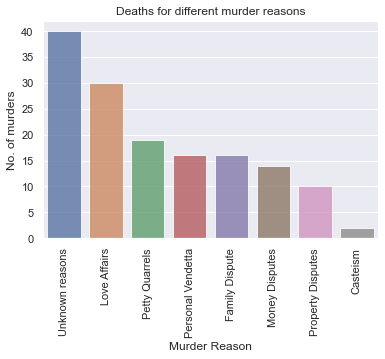

In [15]:
sns.barplot(murder_count.index, murder_count.values, alpha = 0.8)
plt.title('Deaths for different murder reasons')
plt.xlabel('Murder Reason')
plt.ylabel('No. of murders')
plt.xticks(rotation = 'vertical')


In [16]:
df1.columns

Index(['City ', 'Murder Reason', 'Number of child victims',
       'Number of male victims(adult)', 'Number of female victims(adult)'],
      dtype='object')

In [17]:
murder_count_city = df1["City "].value_counts()

c:\users\avi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Murders for different city')

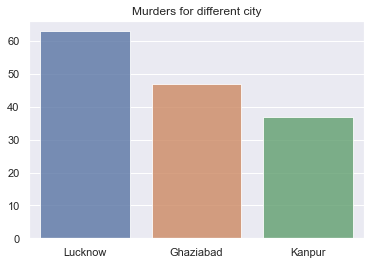

In [18]:
sns.barplot(murder_count_city.index, murder_count_city.values, alpha = 0.8)
plt.title('Murders for different city')

### now  visualisations that I made in TABLEAU to show murder data

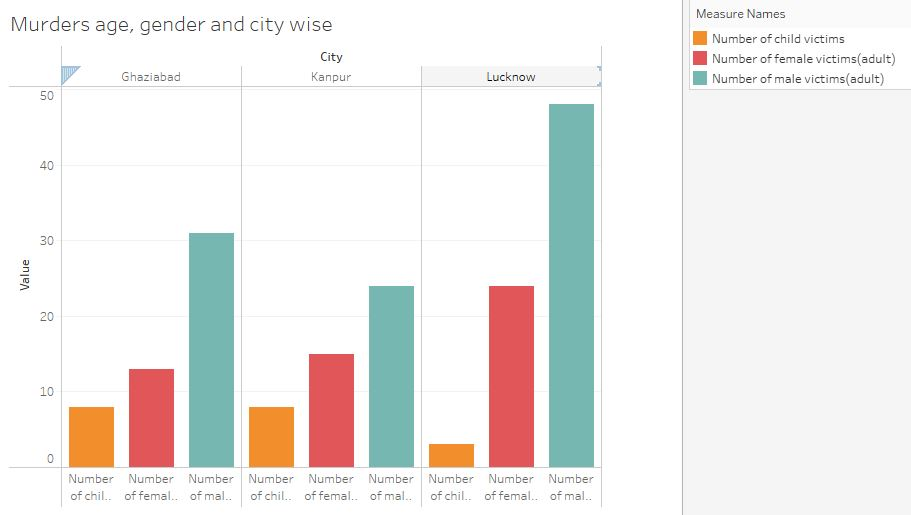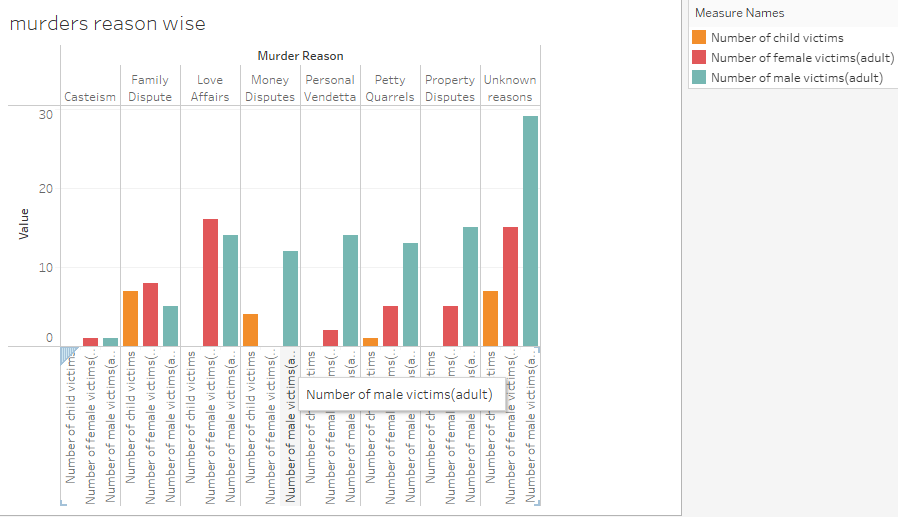


# DATA PROCESSING AND CRIME AGAINST WOMEN DATA VISUALISATION

In [19]:
db.fillna(0, inplace = True)

In [20]:
db.head()

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women,Number of adult victims,Number of childs invoved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [21]:
db.columns

Index(['City ', 'Murder Reason', 'Number of child victims',
       'Number of male victims(adult)', 'Number of female victims(adult)',
       'Kidnnaping:\nNumber of child victims', 'Number of male(adult) ',
       'Number of female(adult)', 'Crime Against Women',
       'Number of adult victims', 'Number of childs invoved'],
      dtype='object')

In [22]:
db.drop(['Murder Reason'], axis = 1)

,City,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women,Number of adult victims,Number of childs invoved
0,Ghaziabad,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0
462,Lucknow,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
463,Lucknow,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0
464,Lucknow,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0


In [23]:
CAW = db['Crime Against Women'].copy()
u_data = []
print(len(CAW))

466


In [24]:
for x in CAW:
    x = str(x)
    #print(x, len(x))
    if len(x) < 2:
        x = x + ",0"
        u_data.append(x)
    else:
        u_data.append(x)
print(len(u_data))
c1 = []
c2 = []
c3 = []
for i in u_data:
    sp = i.split(",")
    #print(sp)
    if len(sp) == 1:   
        c1.append(int(sp[0].strip()))
        c2.append(int(0))
        c3.append(int(0))
    if len(sp) == 2:
        c1.append(int(sp[0].strip()))
        c2.append(int(sp[1].strip()))
        c3.append(int(0))
    if len(sp) == 3:
        c1.append(int(sp[0].strip()))
        c2.append(int(sp[1].strip()))
        c3.append(int(sp[2].strip()))
print(len(c1))
print(len(c2))
print(len(c3))
        
count_c1 = {}        
for j in c1:
    if j in count_c1:
        count_c1[j] = count_c1[j] + 1
    else:
        count_c1[j] = 1        
            
count_c2 = {}        
for j in c2:
    if j in count_c2:
        count_c2[j] = count_c2[j] + 1
    else:
        count_c2[j] = 1        
        
        
count_c3 = {}        
for j in c3:
    if j in count_c3:
        count_c3[j] = count_c3[j] + 1
    else:
        count_c3[j] = 1    
print(count_c1,count_c2,count_c3)        
from collections import Counter 
CAW_count = Counter(count_c1) + Counter(count_c2) + Counter(count_c3)
del CAW_count[0]
print(CAW_count)

466
466
466
466
{8: 55, 0: 266, 10: 5, 9: 7, 4: 5, 7: 50, 1: 19, 3: 20, 2: 19, 6: 14, 5: 3, 11: 3} {10: 41, 0: 398, 7: 5, 3: 5, 4: 2, 6: 4, 9: 3, 8: 8} {0: 459, 6: 4, 10: 3}
Counter({8: 63, 7: 55, 10: 49, 3: 25, 6: 22, 1: 19, 2: 19, 9: 10, 4: 7, 5: 3, 11: 3})


In [25]:
lst = list(CAW_count.items())
lst.sort()
CAW_count_s = dict(lst)
print(CAW_count_s)

{1: 19, 2: 19, 3: 25, 4: 7, 5: 3, 6: 22, 7: 55, 8: 63, 9: 10, 10: 49, 11: 3}


c:\users\avi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


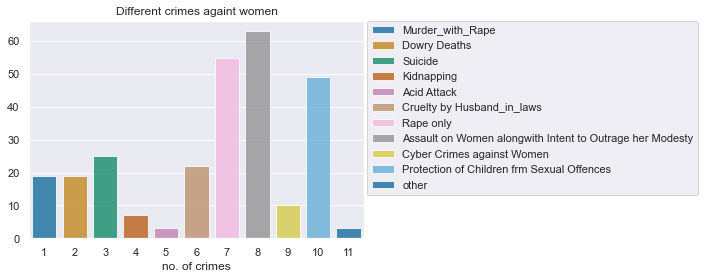

In [26]:
keys = list(CAW_count_s.keys())
values = list(CAW_count_s.values())
crim_list = ['Murder_with_Rape', 'Dowry Deaths', 'Suicide', 'Kidnapping', 'Acid Attack', 'Cruelty by Husband_in_laws', 'Rape only', 'Assault on Women alongwith Intent to Outrage her Modesty', 'Cyber Crimes against Women', 'Protection of Children frm Sexual Offences', 'other']
sns.barplot(keys, values, alpha = 0.8, hue = crim_list, dodge = False, palette = sns.color_palette("colorblind"))
plt.title('Different crimes againt women')
plt.xlabel('no. of crimes')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)


In [27]:
db["CAW1"] = c1
db["CAW2"] = c2
db["CAW3"] = c3

In [28]:
db.head()

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women,Number of adult victims,Number of childs invoved,CAW1,CAW2,CAW3
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0,8,10,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0


In [29]:
db.drop(['Crime Against Women'],axis =1)

,City,Murder Reason,Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Number of adult victims,Number of childs invoved,CAW1,CAW2,CAW3
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8,10,0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7,0,0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,8,0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8,0,0


In [30]:
db.columns

Index(['City ', 'Murder Reason', 'Number of child victims',
       'Number of male victims(adult)', 'Number of female victims(adult)',
       'Kidnnaping:\nNumber of child victims', 'Number of male(adult) ',
       'Number of female(adult)', 'Crime Against Women',
       'Number of adult victims', 'Number of childs invoved', 'CAW1', 'CAW2',
       'CAW3'],
      dtype='object')

In [31]:
CAW_DF  = db[['Number of adult victims', 'Number of childs invoved', 'CAW1', 'CAW2', 'CAW3']].copy()
CAW_DF.head()
    
    

,Number of adult victims,Number of childs invoved,CAW1,CAW2,CAW3
0,0.0,3.0,8,10,0
1,0.0,0.0,0,0,0
2,0.0,0.0,0,0,0
3,0.0,0.0,0,0,0
4,0.0,0.0,0,0,0


In [32]:
CAW_DF.to_csv("crime_against_women_data.csv")

In [33]:
CAW_DF.set_axis(['a', 'b', 'c', 'd', 'e'], axis=1, inplace=False)

,a,b,c,d,e
0,0.0,3.0,8,10,0
1,0.0,0.0,0,0,0
2,0.0,0.0,0,0,0
3,0.0,0.0,0,0,0
4,0.0,0.0,0,0,0
...,...,...,...,...,...
461,1.0,0.0,7,0,0
462,1.0,0.0,1,0,0
463,0.0,1.0,3,8,0
464,1.0,0.0,8,0,0


In [34]:
crim_adult = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0}
crim_child = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0}
key1 = list(crim_adult.keys())
key2 = list(crim_child.keys())
for a,b,c,d,e in CAW_DF.itertuples(index=False):
    if c in key1:
        crim_adult[c] = crim_adult[c]  + int(a)
    if d in key1:
        crim_adult[d] = crim_adult[d]  + int(a)
    if e in key1:
        crim_adult[e] = crim_adult[e]  + int(a)
    if c in key2:
        crim_child[c] = crim_child[c]  + int(b)
    if d in key2:
        crim_child[d] = crim_child[d]  + int(b)
    if e in key2:
        crim_child[e] = crim_child[e]  + int(b) 
        
print(crim_adult)
print(crim_child)


    
    

{1: 6, 2: 19, 3: 17, 4: 2, 5: 7, 6: 20, 7: 18, 8: 44, 9: 8, 10: 1, 11: 3}
{1: 14, 2: 0, 3: 9, 4: 5, 5: 0, 6: 2, 7: 42, 8: 24, 9: 2, 10: 54, 11: 0}


c:\users\avi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


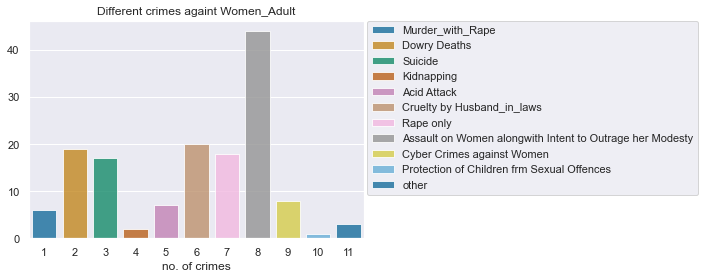

In [35]:
Key1 = list(crim_adult.keys())
Values = list(crim_adult.values())
crim_list = ['Murder_with_Rape', 'Dowry Deaths', 'Suicide', 'Kidnapping', 'Acid Attack', 'Cruelty by Husband_in_laws', 'Rape only', 'Assault on Women alongwith Intent to Outrage her Modesty', 'Cyber Crimes against Women', 'Protection of Children frm Sexual Offences', 'other']
sns.barplot(Key1, Values, alpha = 0.8, hue = crim_list, dodge = False, palette = sns.color_palette("colorblind"))
plt.title('Different crimes againt Women_Adult')
plt.xlabel('no. of crimes')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

c:\users\avi\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


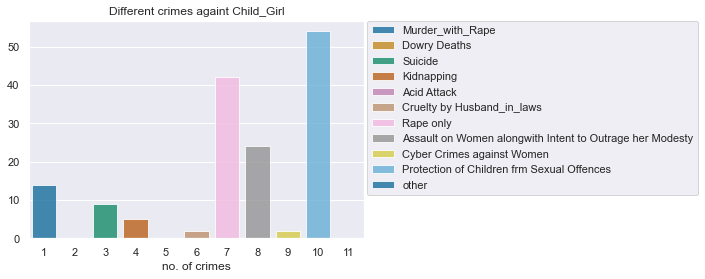

In [36]:
Key2 = list(crim_child.keys())
Value = list(crim_child.values())
crim_list = ['Murder_with_Rape', 'Dowry Deaths', 'Suicide', 'Kidnapping', 'Acid Attack', 'Cruelty by Husband_in_laws', 'Rape only', 'Assault on Women alongwith Intent to Outrage her Modesty', 'Cyber Crimes against Women', 'Protection of Children frm Sexual Offences', 'other']
sns.barplot(Key1, Value, alpha = 0.8, hue = crim_list, dodge = False, palette = sns.color_palette("colorblind"))
plt.title('Different crimes againt Child_Girl')
plt.xlabel('no. of crimes')
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [37]:
df1.to_csv('murder_data.csv')

In [38]:
db.to_csv('processed_data.csv')
    
    

# KIDNAPPING VISUALISATIONS USING TABLEAU

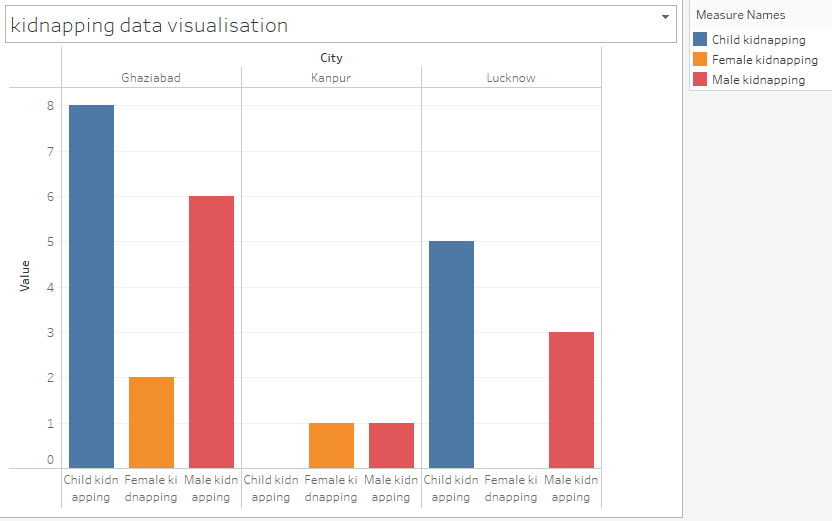

# INFORMATION FROM DATA

### MURDER DATA


In [39]:
#1) Lucknow is the most murder prone area 
#2) Males are more likely to get murdered in Money Disputes, Personal Vendetta, Prtty Quarrels, Property Disputes.
#3) Murder of females in love affairs is significantly more than males.
#4) Love affair is the biggest known reason of murder in U.P
#5) In family disputes womens have more chances of dying,
#   whereas children also have more chances of dying than adult males but less than womans.

### KIDNAPPING DATA

In [40]:
#1) Gaziabad is the most kidnapping prone area where child kidnapping being prominant
#2) Womans have less chances of kidnapping than men and child.
#3) Kanpur  have the lowest cases of kidnapping
#4) Females are very less likely to be kidnapped in kanpur.


### CRIME AGAINST WOMEN DATA

In [41]:
#1) "Assault on Women alongwith Intent to Outrage her Modesty" and "Rape" are the two major crime that happen against women.
#2) "Sexual Offences against girl_child" is also very prominant.
#3) "Murder with Rape" and "Rape Only" is seen more in case of child.
#4) Assault are more seen against adult womens.